**K-Means Clustering:** I have code and the test code to run through the algorithm of K-means. The first section is for importing all the libraries we will be using in the code.

In [1]:
# Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
import time

The following block of code implements the k_means_clustering logic. As demonstrated in the answer for the question 3,the code below follows the steps of the algorithm:
- Use the centers passed in the input, if none, then initialize random centers
- Initialize cluster assignment to 0 for all datapoints.
- Calculate p2 norm distance for each datapoint with all the centers.
    -using numpy's linalg package and norm function to calculate this distance
- For each datapoint, assign cluster which has lowest distance.
- Recalculate a new centroid within a cluster by calculating mean of all datapoints within the cluster.
- Check for convergence = are the centroids in the current iteration same as previous iteration.

    

In [2]:
def k_means_clustering(inputVector, k,
           initialClusterCenters=None):
    
    
    noOfDataPoints=len(inputVector)
    hasConverged = False
    
# use the initial cluster centroids if passed in the input
# If not initialize random centroids

    if initialClusterCenters is None:
        index = np.random.choice(noOfDataPoints, k, replace=False)
        centroids = inputVector[index]
    else:
        centroids = initialClusterCenters
        
# initializing array of 0s for clusters
    clusters = np.zeros(noOfDataPoints)
    
# initializing temp variable to hold old centers. 
# This will be used later to check the convergence
    centersIMinusOne = centroids
    iteration = 1
    
# Loop through 2 steps as discussed in the lecture:
#     1. assign data points to a nearest cluster 
#     2. recalculate the new centroid of the cluster 

    while (not hasConverged):
        centersIMinusOne = centroids
        
#calculating the euclidean distance using norm function from 
# numpy's linear algebra functions
# store the distance from each data point to each centroid.
        
        p2Distances=np.empty((noOfDataPoints,k))
        for i in range(noOfDataPoints):
            p2Distances[i,:]=np.linalg.norm(inputVector[i,:]-centroids,ord=2,axis=1)**2
            
# For each data point, assign to cluster which has lowest distance
        clusters = np.argmin(p2Distances, axis=1)

#calculate new centroid by calculating mean of all the points within a cluster    
        centroids = np.empty(centroids.shape)
        for j in range(k):
            
#Ignoring empty clusters if there are any at higher values of K
            if((inputVector[clusters==j]).size ==0):
                print("ignoring empty cluster")
                continue
                
            centroids[j,:]=np.mean(inputVector[clusters==j,:],axis=0)
                
#compare the new centroids with previous set of centroids to see if they have changed
        hasConverged = np.array_equal(centersIMinusOne,centroids)
        iteration += 1
    print("number of iterations for k = ", k ," is :", iteration)
    return np.array([clusters]).T,np.asmatrix(centroids)

The following code is the helper code that runs the kmeans code written above. It also has helped methods that convert image to an array and also array back to image.

In [3]:
%matplotlib inline
def convertImageToArray(path):
    img = Image.open(path)
    imgArray = np.array(img, dtype='int32')
    img.close()
    return imgArray

def convertArrayToImageAndDisplay(arr):
    arr = arr.astype(dtype='uint8')
    img = Image.fromarray(arr, 'RGB')
    imshow(np.asarray(img))
    plt.show()
    
# Testing function block:
#     Uses MatPlot lib's image function to convert image into array.
#     Each entry of the array will have the RGB values of each pixel.

def run_k_means(k,imgMatrix,centers=None):
    imgIntoSingleArray = imgMatrix.reshape(-1, imgMatrix.shape[-1])
    r, c, l = imgMatrix.shape
    print("running for ",k," centers")
    start=time.time()
    labels,centroids=k_means_clustering(imgIntoSingleArray, k,centers)
    end = time.time()
    print(f"Runtime of the program for ", k," centers:", {end - start})
    imgClusteredArray = np.array([centroids[label] for label in labels])
    imgClusteredMatrix = np.reshape(imgClusteredArray, (r, c, l), order="C")
    print("printing the ",k," clustered image")
    convertArrayToImageAndDisplay(imgClusteredMatrix)
    return labels,centroids




The following is a quick test code that will test the k_means_clustering logic with one file and with 2 centers.Validating the response contains two parameters:
- clusters -  a column array that will show cluster assignment of a datapoint
- cetroids - a matrix of (k,3) shape that will give the co-ordinates of the final centroids.
    

running for  2  centers
number of iterations for k =  2  is : 31
Runtime of the program for  2  centers: {93.95737099647522}
printing the  2  clustered image


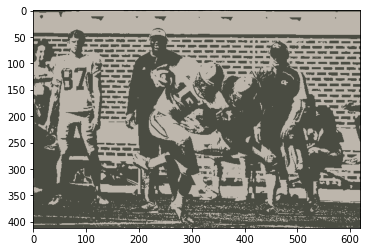

matrix([[189.91441097, 182.64826808, 172.45584686],
        [ 74.59407487,  76.04869875,  66.44037077]])

clusters:
<class 'numpy.ndarray'>
(255440, 1)
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
centroids:
<class 'numpy.matrix'>
(2, 3)


In [9]:
# Test Code to verify the code
# Verifying the response has 2 parameters:
#     1. Clusters : Column vector represnting cluster arrangement of each data point
#     2. Centroids: Matrix of K rows and 3 columns representing the centroids.
        
footballImage = "./data/football.bmp"
img_arr=convertImageToArray(footballImage)
clusters,centroids=run_k_means(2,img_arr)
print("clusters:")

print(type(clusters))
print(clusters.shape)
print(clusters)



print("centroids:")
print(type(centroids))
print(centroids.shape)
display(centroids)


### Question 2.1: 
Compress pictures using k-means, for beach.bmp ,football.bmp and custom image with k=2,4,6,8. Record the number of iterations it takes and time taken for each K.

### Answer:
I have printed the iterations for each K value and time taken for convergence. I have also printed the resulting images in the output.

| Image        | K  | iterations | time-taken (s) |
|--------------|----|------------|----------------|
| football.bmp | 2  | 23         | 73.56          |
| football.bmp | 4  | 67         | 200.6          |
| football.bmp | 8  | 151        | 456.8          |
| football.bmp | 16 | 138        | 417            |
|--------------|----|------------|----------------|
| beach.bmp    | 2  | 20         | 14.5           |
| beach.bmp    | 4  | 19         | 14             |
| beach.bmp    | 8  | 103        | 204.3          |
| beach.bmp    | 16 | 177        | 306            |
|--------------|----|------------|----------------|
| grass.bmp    | 2  | 10         | 9.05           |
| grass.bmp    | 4  | 25         | 24.84          |
| grass.bmp    | 8  | 54         | 53.82          |
| grass.bmp    | 16 | 73         | 77             |
|--------------|----|------------|----------------|



printing the original image


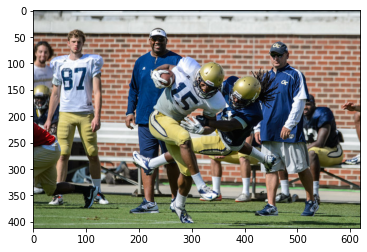

running for  2  centers
number of iterations for k =  2  is : 23
Runtime of the program for  2  centers: {73.56592011451721}
printing the  2  clustered image


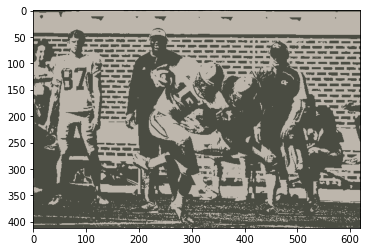

running for  4  centers
number of iterations for k =  4  is : 67
Runtime of the program for  4  centers: {200.61285710334778}
printing the  4  clustered image


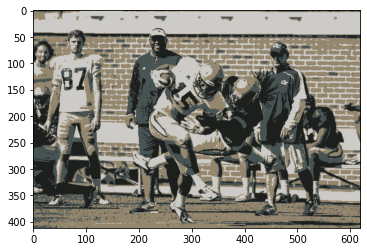

running for  8  centers
number of iterations for k =  8  is : 151
Runtime of the program for  8  centers: {456.8332450389862}
printing the  8  clustered image


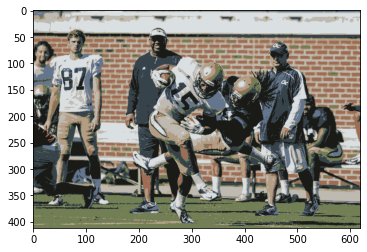

running for  16  centers
number of iterations for k =  16  is : 138
Runtime of the program for  16  centers: {417.2805349826813}
printing the  16  clustered image


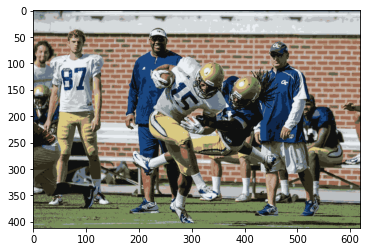

printing the original image


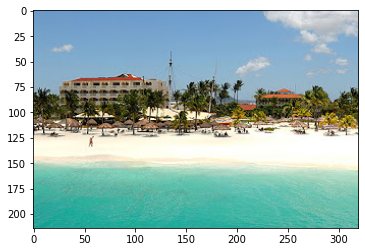

running for  2  centers
number of iterations for k =  2  is : 20
Runtime of the program for  2  centers: {14.50742220878601}
printing the  2  clustered image


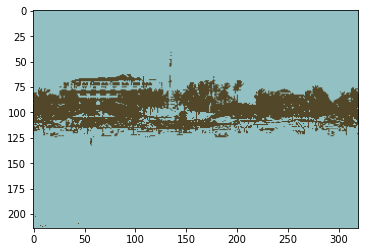

running for  4  centers
number of iterations for k =  4  is : 19
Runtime of the program for  4  centers: {14.014214754104614}
printing the  4  clustered image


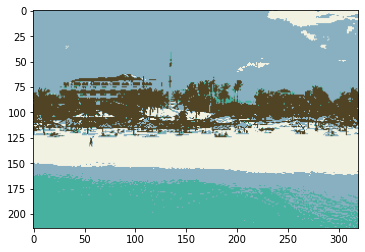

running for  8  centers
number of iterations for k =  8  is : 103
Runtime of the program for  8  centers: {2047.3852989673615}
printing the  8  clustered image


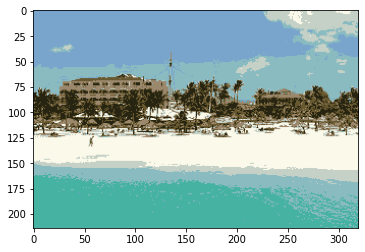

running for  16  centers
number of iterations for k =  16  is : 177
Runtime of the program for  16  centers: {306.1026077270508}
printing the  16  clustered image


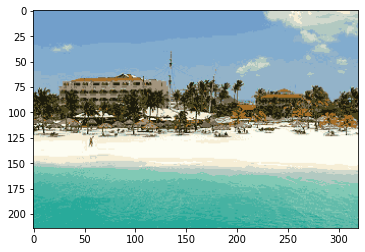

printing the original image


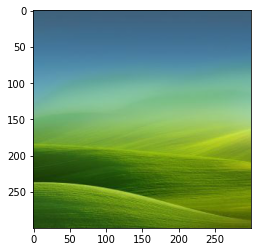

running for  2  centers
number of iterations for k =  2  is : 10
Runtime of the program for  2  centers: {9.050542831420898}
printing the  2  clustered image


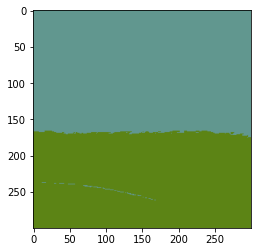

running for  4  centers
number of iterations for k =  4  is : 25
Runtime of the program for  4  centers: {24.84894609451294}
printing the  4  clustered image


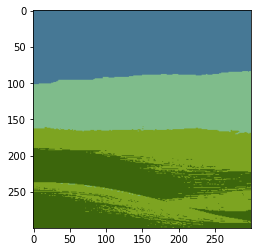

running for  8  centers
number of iterations for k =  8  is : 54
Runtime of the program for  8  centers: {53.792957067489624}
printing the  8  clustered image


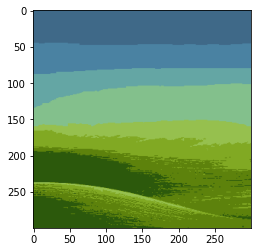

running for  16  centers
number of iterations for k =  16  is : 73
Runtime of the program for  16  centers: {77.03693890571594}
printing the  16  clustered image


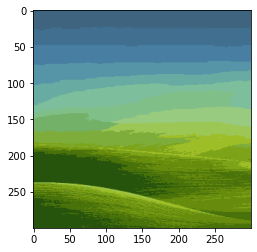

In [402]:
## Question 2.1: Compress pictures using k-means, for beach.bmp ,football.bmp and custom image
# with k=2,4,6,8. Record the number of iterations it takes and time taken for each K
images=[]
footballImage = "./data/football.bmp"
beachImage = "./data/beach.bmp"
grassImage = "./data/grass.bmp"
images.append(footballImage)
images.append(beachImage)
images.append(grassImage)

for image in images:
    imgArray = convertImageToArray(image)
    print("printing the original image")
    convertArrayToImageAndDisplay(imgArray)
    for k in(2,4,8,16):
        run_k_means(k,imgArray)

### Question 2.2: Run your k-means implementation with different initialization centroids. 

### Answer:

I have run the logic wiht 4 different centroid points for K=4. I have picked points across the spread:
<center>

|   | Centroids                                                | Iterations | Time-Taken(s) |
|:---:|:----------------------------------------------------------:|:------------:|:---------------:|
| 1 | [0,0,0],[255,255,255], [100,100,100],[200,200,200]       | 27         | 75.86         |
| 2 | [109,109,109],[110,110,110], [111,111,111],[112,112,112] | 37         | 105.15        |
| 3 | [0,1,2],[2,1,0], [244,0,0],[255,0,0]                     | 30         | 84.51         |
| 4 | [1,2,3],[4,5,6], [7,8,9],[10,11,12]                      | 75         | 221.35        |
</center>

- 1. centroids spaced almost equally and spread from 0 to 255
- 2. All 4 centroids very close to each other but in the middle of the spectrum (109-114).
- 3. 2 centroid close to each other at the beginnin of spectrum and other 2 at the end of the spectrum.
- 4. All 4 centroids very close to each other but at the beginning of the spectrum (1-12).

Observations:

- Irrespective of centroids I pick, the resulting convergence and hence the picture seems to be same.
- The first centroid that has 4 pts spread accross the spectrum converges faster. In around 27 iterations
- The second centroid set that has all 4 points very close to each other, in the middle of the spectrum, takes longer to converge. In around 37 iterations.
- The third set has 2 centroids as at the beginning and 2 centroids at the end of the spectrum, takes longer than 1st set of centroid but faster than 2nd set of centroids
- The 4th set which has all centroids close to each other at one end of spectrum takes longest.

Based on the observations, if the initial centroids are not close to each other and spread across the spectrum, it will result in convergence faster. This is observation is purely based on the data above. I have run this program many times and consistently got similar results.



starting with center:


array([[  0,   0,   0],
       [255, 255, 255],
       [100, 100, 100],
       [200, 200, 200]])

running for  4  centers
number of iterations for k =  4  is : 27
Runtime of the program for  4  centers: {75.86233496665955}
printing the  4  clustered image


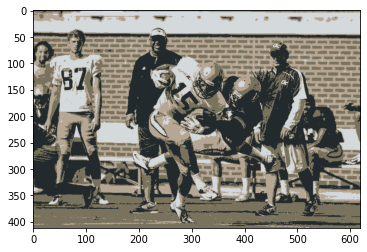

starting with center:


array([[109, 109, 109],
       [110, 110, 110],
       [111, 111, 111],
       [112, 112, 112]])

running for  4  centers
number of iterations for k =  4  is : 37
Runtime of the program for  4  centers: {105.15727591514587}
printing the  4  clustered image


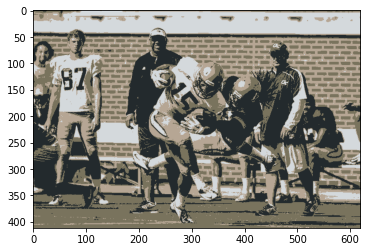

starting with center:


array([[  0,   1,   2],
       [  2,   1,   0],
       [244,   0,   0],
       [255,   0,   0]])

running for  4  centers
number of iterations for k =  4  is : 30
Runtime of the program for  4  centers: {84.51232600212097}
printing the  4  clustered image


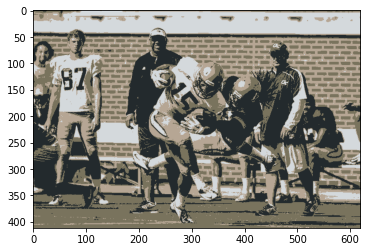

starting with center:


array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

running for  4  centers
number of iterations for k =  4  is : 75
Runtime of the program for  4  centers: {221.35459089279175}
printing the  4  clustered image


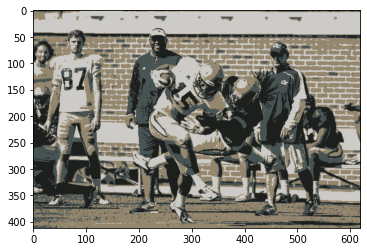

In [403]:
## Question 2.2: Run your k-means implementation with different initialization centroids. 
        
img_arr2=convertImageToArray("./data/football.bmp")
centers=[]
centers.append(np.array([[0,0,0],[255,255,255],[100,100,100],[200,200,200]]))
centers.append(np.array([[109,109,109],[110,110,110],[111,111,111],[112,112,112]]))
centers.append(np.array([[0,1,2],[2,1,0],[244,0,0],[255,0,0]]))
centers.append(np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]))
for center in centers:
    print("starting with center:")
    display(center)
    run_k_means(4,img_arr2,center)